In [18]:
#With NumPy

from time import time
import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt

def calculate_chunksize(size):
    chunksize = size * 1024 // 8
    return chunksize

def calculate_time(ntotal,chunksize,dtype):
    a = np.linspace(0, 10, num=ntotal, dtype=dtype)  ##I create an array that will have a number of elements with a value between 0 and 10
    b = np.linspace(0, 10, num=ntotal, dtype=dtype)
    d2 = np.empty(ntotal, dtype=dtype)
    t0 = time()
    for pi in range(0, ntotal, chunksize):
        i = pi + chunksize  
        d2[pi:i] = (a[pi:i]) ** 3 + 3 * (a[pi:i] ** 2) + 2 * a[pi:i] * b[pi:i] + b[pi:i]
    t = time() - t0
    return t

block_sizes = [ 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192 ]  # Varying block sizes(kilobytes)
execution_times = []
dtype = np.float64
ntotal = (256 * (10 ** 6)) // 8
for size in block_sizes:
    size_bytes = calculate_chunksize(size)
    execution_times.append( 1 / calculate_time(ntotal, size_bytes, dtype) )

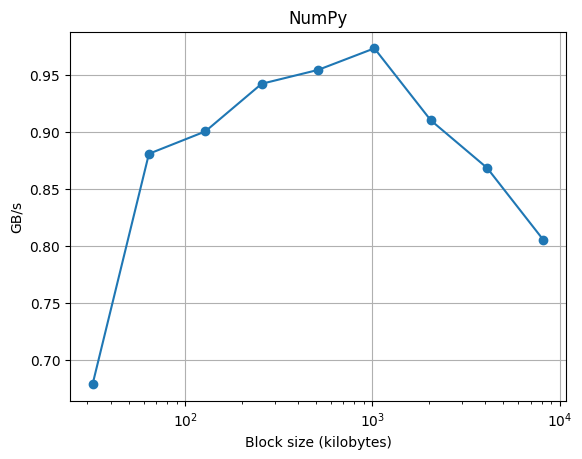

In [19]:
plt.plot(block_sizes, execution_times, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Block size (kilobytes)')
plt.ylabel('GB/s')
plt.title('NumPy')
plt.grid(True)
plt.show()

In [20]:
#With NumExpr

from time import time
import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt


def calculate_chunksize2(size):
    chunksize = size * 1024 // 8
    return chunksize

def calculate_time2(ntotal, chunksize, dtype):
    a = np.linspace(0, 10, num=ntotal,
                    dtype=dtype)  ##I create an array that will have a number of elements with a value between 0 and 10
    b = np.linspace(0, 10, num=ntotal, dtype=dtype)
    d2 = np.empty(ntotal, dtype=dtype)
    entradas = ["aa", "bb", "cc"]
    t0 = time()
    for pi in range(0, ntotal, chunksize):
        i = pi + chunksize
        views = [a[pi:i], b[pi:i]]
        dicc = dict( zip(entradas, views) )
        expr = "aa**3 +3*aa**2 + 2*aa*bb + bb "   #Expressions do not accept operands, I have to tell it to access the dicc
        d2[pi: i] = ne.evaluate(expr, local_dict=dicc)
    t = time() - t0
    return t

block_sizes = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]  # Varying block sizes(kilobytes)
execution_times2 = []
dtype = np.float64
ntotal = (256 * (10 ** 6)) // 8
for size in block_sizes:
    size_bytes = calculate_chunksize2(size)
    execution_times2.append( 1 / calculate_time2(ntotal, size_bytes, dtype) )


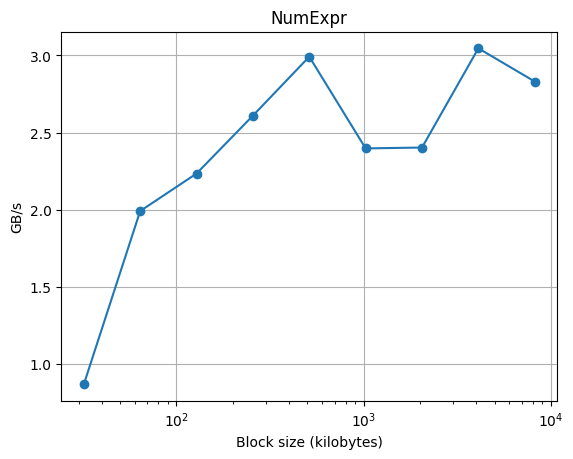

In [21]:
plt.plot(block_sizes, execution_times2, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Block size (kilobytes)')
plt.ylabel('GB/s')
plt.title('NumExpr')
plt.grid(True)
plt.show()

In [22]:
#With Blosc2

from time import time
import numpy as np
import blosc2
import matplotlib.pyplot as plt

def calculate_chunksize3(size):
    chunksize = size * 1024 // 8
    return chunksize

def calculate_time3(ntotal, chunksize, dtype):
    a = blosc2.zeros(shape=ntotal, 
                     dtype=dtype)  ##I create an array that will have a number of elements with a value between 0 and 10
    b = blosc2.zeros(shape=ntotal, dtype=dtype)
    a1 = np.linspace(0, 10, num=ntotal,
                     dtype=dtype)  ##I create an array that will have a number of elements with a value between 0 and 10
    b1 = np.linspace(0, 10, num=ntotal, dtype=dtype)
    a[:] = a1
    b[:] = b1
    d = blosc2.empty(ntotal, dtype=dtype)
    t0 = time()
    for pi in range(0, ntotal, chunksize):
        i = pi + chunksize  
        d[pi:i] = ( a[pi:i] ** 3) + 3 * (a[pi:i] ** 2) + 2 * a[pi:i] * b[pi:i] + b[pi:i]
    t = time() - t0
    return t

block_sizes = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]  # Varying block sizes(kilobytes)
execution_times3 = []
dtype = np.float64
ntotal = ( 256 * (10 ** 6) ) // 8
for size in block_sizes:
    size_bytes = calculate_chunksize3(size)
    print(f"{size_bytes}")
    execution_times3.append( 1 / calculate_time3(ntotal, size_bytes, dtype) )

4096
8192
16384
32768
65536
131072
262144
524288
1048576


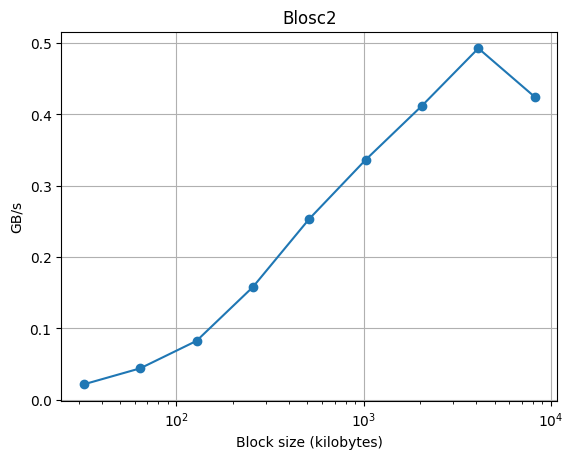

In [23]:
plt.plot(block_sizes, execution_times3, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Block size (kilobytes)')
plt.ylabel('GB/s')
plt.title('Blosc2')
plt.grid(True)
plt.show()

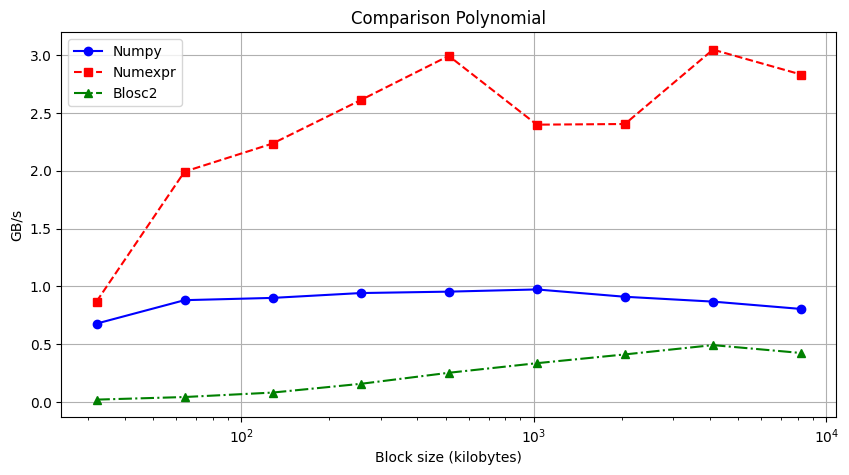

In [24]:
# Create the figure and line graph
plt.figure(figsize=(10, 5))
#Line chart 1
plt.plot(block_sizes, execution_times, marker='o', linestyle='-', color='b', label='Numpy')
#Line chart 2
plt.plot(block_sizes, execution_times2, marker='s', linestyle='--', color='r', label='Numexpr')
#Line Chart 3
plt.plot(block_sizes, execution_times3, marker='^', linestyle='-.', color='g', label='Blosc2')
# Add title and legend
plt.xscale('log')
plt.title('Comparison Polynomial')
plt.xlabel('Block size (kilobytes)')
plt.ylabel('GB/s')
plt.legend()
# Show the graph
plt.grid(True)
plt.show()